## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../Downloads/Mouse_metadata.csv"
study_results_path = "../Downloads/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.

data_df["Mouse ID"].nunique()


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
data_df[data_df.duplicated(['Mouse ID','Timepoint'])]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandata_df = data_df[data_df['Mouse ID'].isin(duplicate_mice)==False]
cleandata=cleandata_df
cleandata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.

cleandata["Mouse ID"].nunique()


248

## Summary Statistics

In [8]:
# # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# # This method is the most straighforward, creating multiple series and putting them all together at the end.


regimen_mean = cleandata_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean


regimen_median = cleandata_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median


regimen_variance = cleandata_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance


regimen_std = cleandata_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = cleandata_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem

# Summary_stats_table_1 = pd.concat([regimen_mean, regimen_median, regimen_variance, regimen_std, regimen_sem], axis = 1)
# Summary_stats_table_1

Summary_stats_table_1 =  pd.DataFrame({
    'Mean': regimen_mean, 
    'Median': regimen_median, 
    'Variance': regimen_variance, 
    'Std. Dev.': regimen_std,
    'Std. Err.': regimen_sem
})

Summary_stats_table_1

,Mean,Median,Variance,Std. Dev.,Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
single_group_by = cleandata_df.groupby('Drug Regimen')
summary_stats_table_2 = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_table_2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

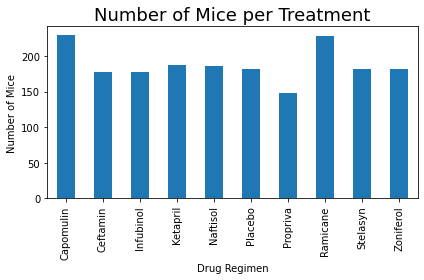

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_treatmentcount = cleandata_df.groupby("Drug Regimen")["Mouse ID"].count() 

mice_per_treatmentcount.plot(kind = 'bar')
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment",fontsize = 18)

plt.tight_layout()
plt.show()




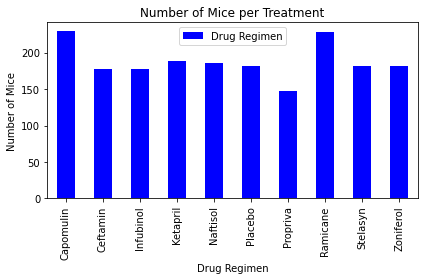

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_group = cleandata_df.groupby('Drug Regimen')

# Create a dataframe counting the number of data points for each Drug Regimen
drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())


# Create a bar chart based off of the group series from before and label the title
count_chart = drug_group_count.plot(kind='bar', title="Number of Mice per Treatment", color="blue")

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Mice")
plt.tight_layout()
# Save the figure
# plt.savefig("figures/PandaBarChart.png")

plt.show()





In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Before generating pie plot we group them by gender to get the count and so the distribution by gender

groupby_gender = cleandata_df.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())


# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

# gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,123,49.596774
Male,125,50.403226


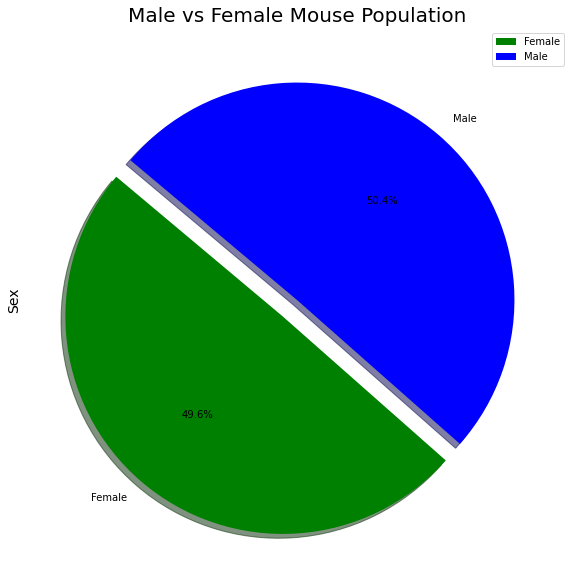

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ['green', 'blue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(12,10), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)

plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = cleandata.loc[cleandata["Drug Regimen"] == "Capomulin",:]
Ramicane_df = cleandata.loc[cleandata["Drug Regimen"] == "Ramicane", :]
Infubinol_df = cleandata.loc[cleandata["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = cleandata.loc[cleandata["Drug Regimen"] == "Ceftamin", :]

# Capomulin

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID')['Timepoint'].max()
Capomulin_vol = pd.DataFrame(Capomulin_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_vol, cleandata, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [42]:
# Put treatments into a list for for loop (and later for plot labels)

Regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)

tumor_vols = []

for Regimen in Regimens:
    final_tumor_volume = cleandata_df.loc[cleandata['Drug Regimen'] == Regimen, 'Tumor Volume (mm3)']
    tumor_vols.append(final_tumor_volume)
    
  
   
 # Calculate the IQR and quantitatively determine if there are any potential outliers.

    quartiles =  final_tumor_volume.quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
#     # Check if it is the first time through the for loop, if so then print dividing line at top only
    print(f"--------------------------------------------------------")
    print(f"{Regimen} IQR data is:")
    print(f"The lower quartile of {Regimen} is: {lowerq}")
    print(f"The upper quartile of {Regimen} is: {upperq}")
    print(f"The interquartile range of {Regimen} is: {iqr}")
    print(f"The the median of {Regimen} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {Regimen} could be outliers.")
    print(f"Values above {upper_bound} for {Regimen} could be outliers.")
    print(f"--------------------------------------------------------")
  
#     # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
#     # add subset 
    
    
#     # Determine outliers using upper and lower bounds
    

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 37.69
The upper quartile of Capomulin is: 45.0
The interquartile range of Capomulin is: 7.31
The the median of Capomulin is: 41.56 
Values below 26.72 for Capomulin could be outliers.
Values above 55.96 for Capomulin could be outliers.
--------------------------------------------------------
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 36.67
The upper quartile of Ramicane is: 45.0
The interquartile range of Ramicane is: 8.33
The the median of Ramicane is: 40.67 
Values below 24.18 for Ramicane could be outliers.
Values above 57.5 for Ramicane could be outliers.
--------------------------------------------------------
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 47.31
The upper quartile of Infubinol is: 57.31
The interquartile range of

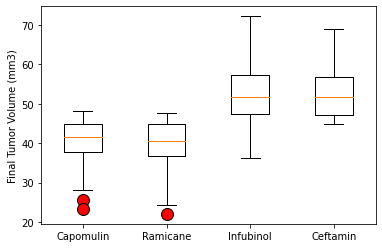

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Regimens= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vols, labels = Regimens,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

# plt.savefig("../Downloads/box_plot.png", bbox_inches = "tight")

## Line and Scatter Plots

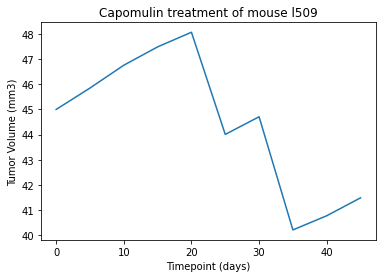

In [49]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_table = cleandata_df.loc[cleandata_df['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

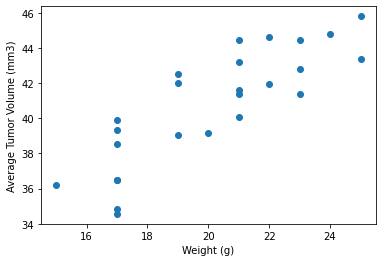

In [50]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


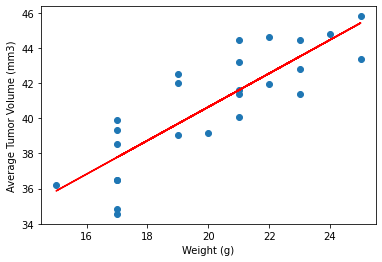

In [51]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])

y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()